# **Task 1: Data Manipulation**

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import scipy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from __future__ import print_function
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

In [2]:
#loading data into the coding environment
CCLE = pd.read_csv('/content/drive/MyDrive/CCLE/CCLE_expression.csv')
CCLE_features = CCLE.drop(['Unnamed: 0'], axis=1)
Info = pd.read_csv('/content/drive/MyDrive/CCLE/sample_info.csv')
Labels_df = Info[['DepMap_ID','sample_collection_site']]

Counter({'pleural_effusion': 138, 'haematopoietic_and_lymphoid_tissue': 127, 'lymph_node': 104, 'lung': 101, 'central_nervous_system': 99, 'ascites': 74, 'skin': 60, 'soft_tissue': 56, 'upper_aerodigestive_tract': 50, 'bone_marrow': 50, 'liver': 48, 'bone': 39, 'endometrium': 36, 'kidney': 35, 'fibroblast': 35, 'biliary_tract': 33, 'large_intestine': 33, 'ovary': 33, 'urinary_tract': 31, 'breast': 30, 'pancreas': 28, 'oesophagus': 27, 'Colon': 22, 'autonomic_ganglia': 18, 'cervix': 14, 'abdomen': 13, 'stomach': 13, 'thyroid': 13, 'eye': 9, 'prostate': 8, 'uvea': 6, 'pleura': 6, nan: 4, 'pericardial_effusion': 3, 'small_intestine': 2, 'Embryonal': 2, 'spleen': 2, 'Placenta': 2, 'sinonasal': 1, 'salivary_gland': 1})
Number of classes is 40
                                 index    0
0                                 lung  101
1               central_nervous_system   99
2                                 skin   60
3                        biliary_tract   33
4                        urinary

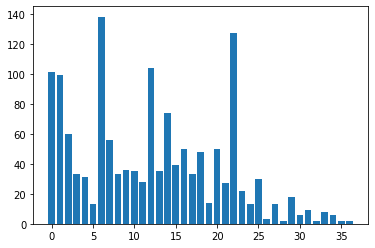

In [247]:
Data = CCLE_features.to_numpy()
Y = []
ind = 0
for index, row in CCLE.iterrows():
  Y.append(Labels_df.loc[Labels_df['DepMap_ID'] == row['Unnamed: 0']]['sample_collection_site'].item())

cnt = Counter(Y)
keys = Counter(Y).keys()
values = Counter(Y).values()
print(cnt)
print(f"Number of classes is {len(cnt)}")
cnt_df = pd.DataFrame.from_dict(cnt, orient='index').reset_index()
print(cnt_df)
#plt.bar(range(len(cnt)), cnt.values())


non_label_ind = [555, 883, 983, 1137]
Data = np.delete(Data,non_label_ind,0)
Y = np.delete(Y,non_label_ind,0)

singular_sample_ind1 = np.where(Y=='sinonasal')
Data = np.delete(Data,singular_sample_ind1,0)
Y = np.delete(Y,singular_sample_ind1,0)

singular_sample_ind2= np.where(Y=='salivary_gland')
Data = np.delete(Data,singular_sample_ind2,0)
Y = np.delete(Y,singular_sample_ind2,0)

le = preprocessing.LabelEncoder()
Labels_tv = le.fit_transform(Y)
Labels_org = le.inverse_transform(Labels_tv)

mostly_not_expressed = []
for col in range(Data.shape[1]):
  zero_count = np.count_nonzero(Data[:,col] == 0)
  if (zero_count/Data.shape[0])>0.9:
    mostly_not_expressed.append(col)

Data = np.delete(Data,mostly_not_expressed,1)
cnt = Counter(Y)
keys = Counter(Y).keys()
values = Counter(Y).values()
print(f"Number of classes is {len(cnt)}")
plt.bar(range(len(cnt)), cnt.values())
cnt_df = pd.DataFrame.from_dict(cnt, orient='index').reset_index()
print(cnt_df)

In [4]:
#removing genes having low variability across all samples and then normalize data
gene_dev = np.std(Data, axis=0)
low_var_ind = np.where(gene_dev < 0.1)[0]
filtered_GE = np.delete(Data,low_var_ind,1)
Data_normalized = scipy.stats.zscore(filtered_GE)

In [5]:
#split dataset into Training, validation, and test set
X, X_test, y, y_test = train_test_split(Data_normalized, Labels_tv, test_size=0.1, random_state=37,stratify=Labels_tv, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.111, random_state=81,stratify=y, shuffle=True) # 0.111 x 0.9 = 0.1

In [6]:
#computing class weights
X_class_weights = compute_class_weight('balanced',classes=np.unique(y),y=y)
X_class_weights_dict = {i : X_class_weights[i] for i,label in enumerate(np.unique(y))}

X_train_class_weights = compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)
X_train_class_weights_dict = {i : X_train_class_weights[i] for i,label in enumerate(np.unique(y_train))}

In [7]:
print('number of Training samples: ' +str(X_train.shape[0]))
print('X_train shape: '+str(X_train.shape))
print('y_train shape: '+str(y_train.shape)+'\n')

print('number of Validation samples: ' +str(X_val.shape[0]))
print('X_val shape: '+str(X_val.shape))
print('y_val shape: '+str(y_val.shape)+'\n')

print('number of Test samples: ' +str(X_test.shape[0]))
print('X_test shape: '+str(X_test.shape))
print('y_test shape: '+str(y_test.shape))

number of Training samples: 1120
X_train shape: (1120, 18033)
y_train shape: (1120,)

number of Validation samples: 140
X_val shape: (140, 18033)
y_val shape: (140,)

number of Test samples: 140
X_test shape: (140, 18033)
y_test shape: (140,)


# **Task 2a: Deep Unsupervised Learning (Autoencoder)**

In [198]:
latent_dim = 512

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Dense(latent_dim, activation='relu'),
      Dropout(0.5),
      BatchNormalization(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(latent_dim, activation='relu'),
      Dropout(0.5),
      BatchNormalization(),
      layers.Dense(X_train.shape[1], activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [9]:
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X_train, X_train, epochs=250, shuffle=True, batch_size= 512, validation_data = (X_val, X_val), verbose=1)

Epoch 1/250
3/3 [==============================] - 6s 1s/step - loss: 1.0225 - val_loss: 1.3548
Epoch 2/250
3/3 [==============================] - 2s 648ms/step - loss: 0.9818 - val_loss: 6.7596
Epoch 3/250
3/3 [==============================] - 2s 638ms/step - loss: 0.9544 - val_loss: 7.2983
Epoch 4/250
3/3 [==============================] - 2s 637ms/step - loss: 0.9262 - val_loss: 5.2586
Epoch 5/250
3/3 [==============================] - 2s 635ms/step - loss: 0.9080 - val_loss: 4.6712
Epoch 6/250
3/3 [==============================] - 2s 641ms/step - loss: 0.8962 - val_loss: 4.5559
Epoch 7/250
3/3 [==============================] - 2s 634ms/step - loss: 0.8892 - val_loss: 4.4030
Epoch 8/250
3/3 [==============================] - 2s 637ms/step - loss: 0.8812 - val_loss: 3.5374
Epoch 9/250
3/3 [==============================] - 2s 642ms/step - loss: 0.8726 - val_loss: 2.7314
Epoch 10/250
3/3 [==============================] - 2s 641ms/step - loss: 0.8643 - val_loss: 2.2842
Epoch 11/250

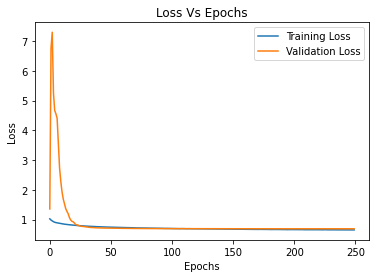

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [11]:
#Encode all the samples (X, X_train, X_val, X_test) using the trained Autoencoder
X_encoded = autoencoder.encoder(X).numpy()
X_train_encoded = autoencoder.encoder(X_train).numpy()
X_val_encoded = autoencoder.encoder(X_val).numpy()
X_test_encoded = autoencoder.encoder(X_test).numpy()

# **Task 2b: Shallow Supervised Learning (KNN, LDA, SVM, and RF)**

In [12]:
print("*** Accuracy on Validation Set ***\n")

#KNN
print('KNN Classifier:\n')
K = list(range(1, 30, 2))
KNN_acc_encd =[]
KNN_acc_GE =[]
for k in K:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X_train_encoded, y_train)
  y_pred_KNN = KNN.predict(X_val_encoded)
  #print('KNN Classifier:\n')
  acc_KNN = sum(np.equal(y_val,y_pred_KNN[0:len(y_val)]) == True)/len(y_val)
  KNN_acc_encd.append(acc_KNN)
  #print('* Using Encoded Data')
  #print('accuracy: '+ str(acc_KNN))
  #print('\n')

  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X_train, y_train)
  y_pred_KNN = KNN.predict(X_val)
  #print('KNN Classifier:\n')
  acc_KNN = sum(np.equal(y_val,y_pred_KNN[0:len(y_val)]) == True)/len(y_val)
  KNN_acc_GE.append(acc_KNN)
  #print('* the Gene Expression')
  #print('accuracy: '+ str(acc_KNN))
  #print('\n')

KNN_df = pd.DataFrame(list(zip(K,KNN_acc_encd, KNN_acc_GE)), columns =['K','Encoded', 'Gene Expression'])
blankIndex=[''] * len(KNN_df)
KNN_df.index=blankIndex
print(KNN_df)

best_K_encd = 2*(np.argmax(KNN_acc_encd))+1
best_K_GE = 2*(np.argmax(KNN_acc_GE))+1

#LDA
LDA_clf = LinearDiscriminantAnalysis()
LDA_clf.fit(X_train_encoded, y_train)
y_pred_LDA = LDA_clf.predict(X_val_encoded)
print('\n\nLDA Classifier:\n')
acc_LDA = sum(np.equal(y_val,y_pred_LDA[0:len(y_val)]) == True)/len(y_val)
print('* Using Encoded Data')
print('accuracy: '+ str(acc_LDA))
print('\n')

LDA_clf = LinearDiscriminantAnalysis()
LDA_clf.fit(X_train, y_train)
y_pred_LDA = LDA_clf.predict(X_val)
acc_LDA = sum(np.equal(y_val,y_pred_LDA[0:len(y_val)]) == True)/len(y_val)
print('* Using the Gene Expression')
print('accuracy: '+ str(acc_LDA))
print('\n')


#SVM
print('\n\nSVM Classifier:\n')
C=[150,120,100,10,1,0.1]
SVM_acc_encd =[]
SVM_acc_GE =[]
for c in C:
  SVM_clf = SVC(C=c)
  SVM_clf.fit(X_train_encoded, y_train)
  y_pred_SVM = SVM_clf.predict(X_val_encoded)
  #print('SVM Classifier:\n')
  acc_SVM = sum(np.equal(y_val,y_pred_SVM[0:len(y_val)]) == True)/len(y_val)
  SVM_acc_encd.append(acc_SVM)
  #print('* Using Encoded Data')
  #print('accuracy: '+ str(acc_SVM))
  #print('\n')

  SVM_clf = SVC(C=c)
  SVM_clf.fit(X_train, y_train)
  y_pred_SVM = SVM_clf.predict(X_val)
  acc_SVM = sum(np.equal(y_val,y_pred_SVM[0:len(y_val)]) == True)/len(y_val)
  SVM_acc_GE.append(acc_SVM)
  #print('* Using the Gene Expression')
  #print('accuracy: '+ str(acc_SVM))
  #print('\n')
SVM_df = pd.DataFrame(list(zip(C,SVM_acc_encd, SVM_acc_GE)), columns =['C','Encoded', 'Gene Expression'])
blankIndex=[''] * len(SVM_df)
SVM_df.index=blankIndex
print(SVM_df)

best_C_encd = C[(np.argmax(SVM_acc_encd))]
best_C_GE = C[(np.argmax(SVM_acc_GE))]


#Random Forest
print('\n\nRandom Forest Classifier:\n')
trees=[200,150,100,50]
RF_acc_encd =[]
RF_acc_GE =[]
for n in trees:
  RF = RandomForestClassifier(n_estimators=n)
  RF.fit(X_train_encoded, y_train)
  y_pred_RF = RF.predict(X_val_encoded)
  #print('Random Forest Classifier:\n')
  acc_RF = sum(np.equal(y_val,y_pred_RF[0:len(y_val)]) == True)/len(y_val)
  RF_acc_encd.append(acc_RF)
  #print('* Using Encoded Data')
  #print('accuracy: '+ str(acc_RF))
  #print('\n')

  RF = RandomForestClassifier(n_estimators=n)
  RF.fit(X_train, y_train)
  y_pred_RF = RF.predict(X_val)
  acc_RF = sum(np.equal(y_val,y_pred_RF[0:len(y_val)]) == True)/len(y_val)
  RF_acc_GE.append(acc_RF)
  #print('* Using the Gene Expression')
  #print('accuracy: '+ str(acc_RF))
  #print('\n')
RF_df = pd.DataFrame(list(zip(trees,RF_acc_encd, RF_acc_GE)), columns =['n_trees','Encoded', 'Gene Expression'])
blankIndex=[''] * len(RF_df)
RF_df.index=blankIndex
print(RF_df)

best_n_encd = trees[(np.argmax(RF_acc_encd))]
best_n_GE = trees[(np.argmax(RF_acc_GE))]

*** Accuracy on Validation Set ***

KNN Classifier:

   K   Encoded  Gene Expression
   1  0.407143         0.392857
   3  0.400000         0.414286
   5  0.428571         0.435714
   7  0.457143         0.478571
   9  0.421429         0.457143
  11  0.450000         0.457143
  13  0.435714         0.457143
  15  0.442857         0.450000
  17  0.435714         0.457143
  19  0.428571         0.471429
  21  0.407143         0.450000
  23  0.407143         0.457143
  25  0.450000         0.457143
  27  0.450000         0.464286
  29  0.450000         0.457143


LDA Classifier:

* Using Encoded Data
accuracy: 0.4642857142857143


* Using the Gene Expression
accuracy: 0.5357142857142857




SVM Classifier:

      C   Encoded  Gene Expression
  150.0  0.485714         0.507143
  120.0  0.485714         0.507143
  100.0  0.485714         0.507143
   10.0  0.485714         0.507143
    1.0  0.514286         0.485714
    0.1  0.221429         0.171429


Random Forest Classifier:

  n_trees   

# **Task 2c: Deep Supervised Learning (MLP)**

In [200]:
y_categorical = tf.keras.utils.to_categorical(np.array(y),37)
y_train_categorical = tf.keras.utils.to_categorical(np.array(y_train),37)
y_val_categorical = tf.keras.utils.to_categorical(np.array(y_val),37)
y_test_categorical = tf.keras.utils.to_categorical(np.array(y_test),37)

In [213]:
model_MLP_GE = Sequential([
        Dense(64, activation = 'relu',input_shape=(X_train.shape[1],), kernel_regularizer='l2', name='Dense_1'),
        Dropout(0.5),
        Dense(37, activation='softmax', name='Output'),
    ])
model_MLP_GE.summary()
model_MLP_GE.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_MLP_GE.fit(X_train, y_train_categorical, epochs = 85, batch_size= 512, validation_data = (X_val, y_val_categorical),class_weight=X_train_class_weights_dict, verbose=1)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 64)                1154176   
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 Output (Dense)              (None, 37)                2405      
                                                                 
Total params: 1,156,581
Trainable params: 1,156,581
Non-trainable params: 0
_________________________________________________________________
Epoch 1/85
3/3 [==============================] - 2s 512ms/step - loss: 6.9142 - accuracy: 0.0562 - val_loss: 5.7181 - val_accuracy: 0.2214
Epoch 2/85
3/3 [==============================] - 0s 79ms/step - loss: 5.8049 - accuracy: 0.1732 - val_loss: 5.6221 - val_accuracy: 0.2786
Epoch 3/85
3/3 [============

5/5 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.20      0.14      0.17         7
           5       0.67      1.00      0.80         2
           6       0.60      1.00      0.75         3
           7       0.67      1.00      0.80         4
           8       0.00      0.00      0.00         5
           9       0.60      1.00      0.75         3
          10       0.58      0.70      0.64        10
          11       0.00      0.00      0.00         1
          12       0.40      0.50      0.44         4
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         4
          15       0.64      0.69      0.67        13
          16       0.57      1.00      0.73         4
          17       0.00      0.00      0.00         3
          18       1.00      0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


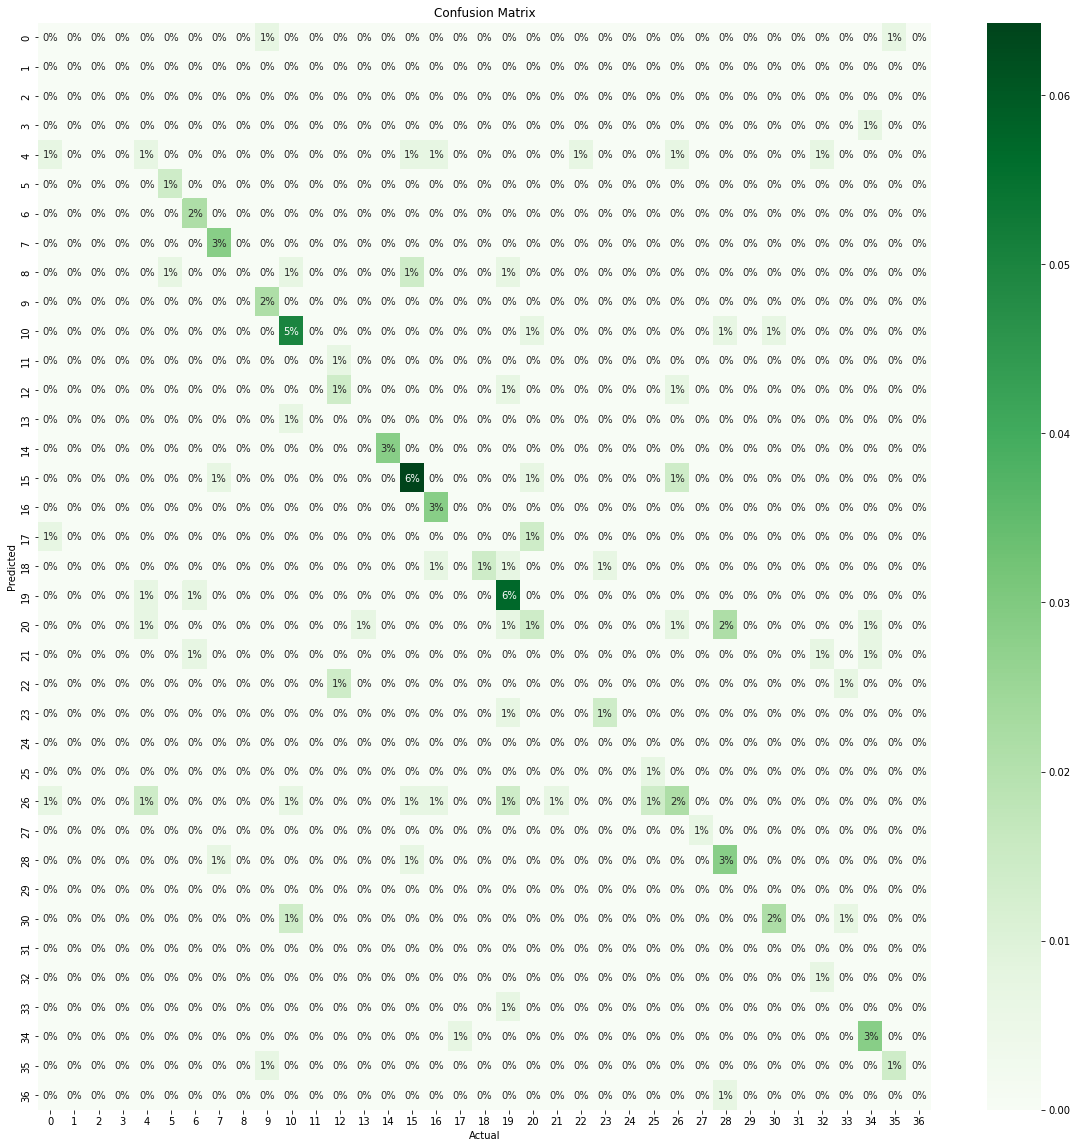

In [211]:
preds = model_MLP_GE.predict(X_val)
print(classification_report(tf.argmax(y_val_categorical,axis=1),tf.argmax(preds,axis=1)))
cm = confusion_matrix(labels = tf.argmax(y_val_categorical,axis=1), predictions = tf.argmax(preds,axis=1))
plt.figure(figsize = (20,20))
ax= sns.heatmap(cm/np.sum(cm), annot=True,fmt='.0%',cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel("Predicted")
plt.xlabel("Actual");
plt.show()

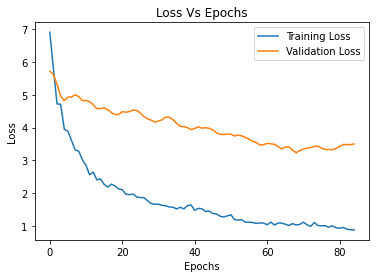

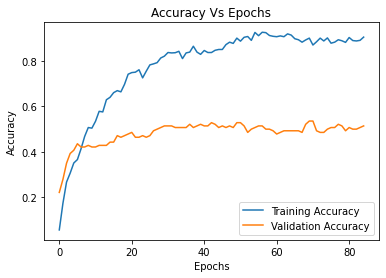

In [214]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [221]:
model_MLP_encd = Sequential([
        Dense(64, activation = 'relu',input_shape=(X_train_encoded.shape[1],), kernel_regularizer='l2',  name='Dense_1'),
        Dropout(0.5),
        Dense(37, activation='softmax', name='Output'),
    ])
model_MLP_encd.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_MLP_encd.fit(X_train_encoded, y_train_categorical, epochs = 200, batch_size= 512, validation_data = (X_val_encoded, y_val_categorical),class_weight=X_train_class_weights_dict, verbose=1)

Epoch 1/200
3/3 [==============================] - 2s 238ms/step - loss: 6.3505 - accuracy: 0.0330 - val_loss: 4.8460 - val_accuracy: 0.0214
Epoch 2/200
3/3 [==============================] - 0s 26ms/step - loss: 5.1698 - accuracy: 0.0437 - val_loss: 4.6284 - val_accuracy: 0.0571
Epoch 3/200
3/3 [==============================] - 0s 32ms/step - loss: 4.8401 - accuracy: 0.0598 - val_loss: 4.5159 - val_accuracy: 0.1286
Epoch 4/200
3/3 [==============================] - 0s 28ms/step - loss: 4.6532 - accuracy: 0.0661 - val_loss: 4.4485 - val_accuracy: 0.1357
Epoch 5/200
3/3 [==============================] - 0s 27ms/step - loss: 4.4326 - accuracy: 0.0893 - val_loss: 4.3963 - val_accuracy: 0.1571
Epoch 6/200
3/3 [==============================] - 0s 29ms/step - loss: 4.3663 - accuracy: 0.1054 - val_loss: 4.3419 - val_accuracy: 0.1857
Epoch 7/200
3/3 [==============================] - 0s 24ms/step - loss: 4.2454 - accuracy: 0.1205 - val_loss: 4.2723 - val_accuracy: 0.2071
Epoch 8/200
3/3 [==

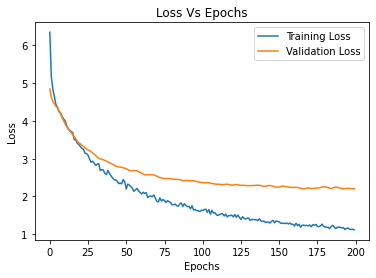

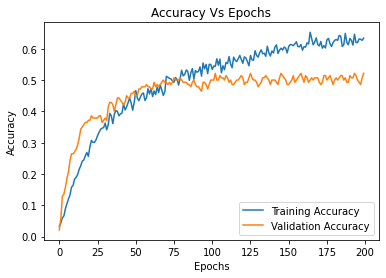

In [222]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

# **Task 3: Model Evaluation**

In [225]:
print("*** Accuracy on Test Set ***\n")

#KNN
KNN = KNeighborsClassifier(n_neighbors=best_K_encd)
KNN.fit(X_encoded, y)
y_pred_KNN = KNN.predict(X_test_encoded)
print('KNN Classifier:\n')
acc_KNN = sum(np.equal(y_test,y_pred_KNN[0:len(y_test)]) == True)/len(y_test)
print('* Using Encoded Data')
print('accuracy: '+ str(acc_KNN))
print('\n')

KNN = KNeighborsClassifier(n_neighbors=best_K_GE)
KNN.fit(X, y)
y_pred_KNN = KNN.predict(X_test)
acc_KNN = sum(np.equal(y_test,y_pred_KNN[0:len(y_test)]) == True)/len(y_test)
print('* the Gene Expression')
print('accuracy: '+ str(acc_KNN))
print('\n')



LDA_clf = LinearDiscriminantAnalysis()
LDA_clf.fit(X_encoded, y)
y_pred_LDA = LDA_clf.predict(X_test_encoded)
print('LDA Classifier:\n')
acc_LDA = sum(np.equal(y_test,y_pred_LDA[0:len(y_test)]) == True)/len(y_test)
print('* Using Encoded Data')
print('accuracy: '+ str(acc_LDA))
print('\n')

LDA_clf.fit(X, y)
y_pred_LDA = LDA_clf.predict(X_test)
acc_LDA = sum(np.equal(y_test,y_pred_LDA[0:len(y_test)]) == True)/len(y_test)
print('* Using the Gene Expression')
print('accuracy: '+ str(acc_LDA))
print('\n')


SVM_clf = SVC(C=best_C_encd)
SVM_clf.fit(X_encoded, y)
y_pred_SVM = SVM_clf.predict(X_test_encoded)
print('SVM Classifier:\n')
acc_SVM = sum(np.equal(y_test,y_pred_SVM[0:len(y_test)]) == True)/len(y_test)
print('* Using Encoded Data')
print('accuracy: '+ str(acc_SVM))
print('\n')

SVM_clf = SVC(C=best_C_GE)
SVM_clf.fit(X, y)
y_pred_SVM = SVM_clf.predict(X_test)
acc_SVM = sum(np.equal(y_test,y_pred_SVM[0:len(y_test)]) == True)/len(y_test)
print('* Using the Gene Expression')
print('accuracy: '+ str(acc_SVM))
print('\n')



RF = RandomForestClassifier(n_estimators=best_n_encd)
RF.fit(X_encoded, y)
y_pred_RF = RF.predict(X_test_encoded)
print('Random Forest Classifier:\n')
acc_RF = sum(np.equal(y_test,y_pred_RF[0:len(y_test)]) == True)/len(y_test)
print('* Using Encoded Data')
print('accuracy: '+ str(acc_RF))
print('\n')

RF = RandomForestClassifier(n_estimators=best_n_GE)
RF.fit(X, y)
y_pred_RF = RF.predict(X_test)
acc_RF = sum(np.equal(y_test,y_pred_RF[0:len(y_test)]) == True)/len(y_test)
print('* Using the Gene Expression')
print('accuracy: '+ str(acc_RF))
print('\n')

*** Accuracy on Test Set ***

KNN Classifier:

* Using Encoded Data
accuracy: 0.45714285714285713


* the Gene Expression
accuracy: 0.42857142857142855


LDA Classifier:

* Using Encoded Data
accuracy: 0.45714285714285713


* Using the Gene Expression
accuracy: 0.5


SVM Classifier:

* Using Encoded Data
accuracy: 0.4357142857142857


* Using the Gene Expression
accuracy: 0.45714285714285713


Random Forest Classifier:

* Using Encoded Data
accuracy: 0.45714285714285713


* Using the Gene Expression
accuracy: 0.45714285714285713




In [246]:
#MLP
#MLP trained with the the encoded data

model_MLP_encd.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_MLP_encd.fit(X_encoded, y_categorical, epochs = 40, batch_size= 512, class_weight=X_class_weights_dict, verbose=False)

print('MLP (trained with the the encoded data):\n')
test_loss, test_accuracy = model_MLP_encd.evaluate(X_test_encoded, y_test_categorical, verbose=False)
print(f"Test Loss is {test_loss}")
print(f"Test Accuracy is {test_accuracy}\n\n")

MLP (trained with the the encoded data):

Test Loss is 3.8583173751831055
Test Accuracy is 0.4357142746448517




In [232]:
#MLP trained with the Gene Expression

model_MLP_GE.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_MLP_GE.fit(X, y_categorical, epochs = 100, batch_size= 512, class_weight=X_class_weights_dict, verbose=False)

print('MLP (trained with the the Gene Expression):\n')
test_loss, test_accuracy = model_MLP_GE.evaluate(X_test, y_test_categorical, verbose=False)
print(f"Test Loss is {test_loss}")
print(f"Test Accuracy is {test_accuracy}\n\n")

MLP (trained with the the Gene Expression):

Test Loss is 3.21848726272583
Test Accuracy is 0.5




# **Task 4: Cluster Analysis**

In [177]:
SILHO =[]
for num_cluster in range(25,55):
  Kmean = KMeans(n_clusters=num_cluster, random_state=0)
  Kmean.fit(X_encoded)
  cluster_labels = Kmean.predict(X_encoded)
  silhouette_avg = silhouette_score(X_encoded, cluster_labels)
  SILHO.append(silhouette_avg)
SILHO = np.array(SILHO)
print("silhouette array:" + str(SILHO))

silhouette array:[0.0772241  0.0767258  0.08090082 0.07918901 0.08605155 0.08120435
 0.08285002 0.08481442 0.07955123 0.08344539 0.07715295 0.0859443
 0.07884599 0.08353449 0.07734413 0.07964887 0.07881552 0.08216999
 0.07420846 0.07759495 0.08379502 0.0868203  0.07816753 0.08407423
 0.08186762 0.07739589 0.07961518 0.08431265 0.08007884 0.0750027 ]


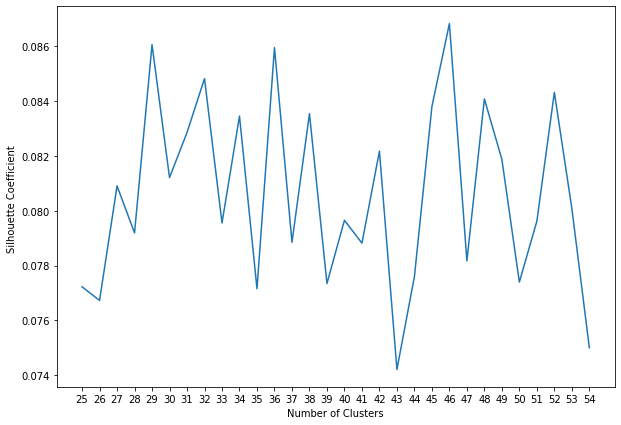

In [178]:
plt.figure(figsize = (10,7))
plt.plot(SILHO)
xtick = np.array(range(25,55))
#plt.xticks(labels=xtick)
plt.xticks(np.arange(30),xtick)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient ')
plt.show()

In [179]:
best_num_cluster = np.argmax(SILHO) + 25
print("the best number of clusters: " +str(best_num_cluster))

the best number of clusters: 46


In [180]:
Kmean = KMeans(n_clusters=best_num_cluster, random_state=0)
Kmean.fit(X)
cluster_labels = Kmean.predict(X)
print("cluster labels: "+str(cluster_labels))
clusters_source_index =[]
num_cluster_samples =[]
for cluster in range(0,best_num_cluster):
  cluster_list = np.where(np.equal(cluster_labels, cluster))
  cluster_list = np.array(cluster_list)
  cluster_list = np.squeeze(cluster_list)
  if cluster_list.shape ==():
    temp = cluster_list
    x = temp.astype(int)
    cluster_list = np.array([x])
  list_sub = list(cluster_list)
  clusters_source_index.append(list_sub)
  num_cluster_samples.append(len(list_sub))
clusters_index = np.array(clusters_source_index)
cluster_num_of_sources = np.array(num_cluster_samples)
print("number of subjects in clusters: " +str(num_cluster_samples))
print("cluster_source_index :" +str(clusters_source_index))

cluster labels: [ 6 17 23 ... 40 26 43]
number of subjects in clusters: [29, 19, 20, 35, 32, 35, 79, 41, 11, 14, 60, 19, 7, 19, 45, 26, 59, 53, 20, 18, 37, 9, 11, 35, 9, 34, 74, 14, 11, 5, 23, 11, 9, 10, 71, 3, 29, 33, 5, 70, 17, 20, 13, 43, 5, 18]
cluster_source_index :[[135, 182, 274, 382, 405, 409, 410, 430, 469, 479, 482, 517, 586, 601, 622, 721, 867, 870, 914, 926, 986, 1009, 1015, 1040, 1072, 1073, 1127, 1219, 1247], [6, 80, 156, 232, 406, 413, 441, 445, 530, 571, 574, 583, 627, 735, 757, 1014, 1100, 1144, 1217], [71, 92, 197, 220, 291, 433, 438, 448, 488, 602, 609, 623, 685, 698, 727, 799, 917, 939, 1003, 1066], [4, 276, 367, 369, 377, 401, 446, 459, 508, 513, 529, 547, 579, 587, 620, 690, 692, 772, 789, 853, 871, 887, 915, 952, 953, 960, 975, 977, 1008, 1011, 1095, 1173, 1182, 1198, 1229], [19, 68, 74, 79, 157, 168, 173, 195, 248, 332, 461, 465, 505, 541, 562, 607, 733, 734, 773, 776, 821, 842, 862, 873, 932, 995, 1002, 1027, 1125, 1162, 1165, 1245], [9, 48, 51, 133, 171, 198, 

<ipython-input-180-9f4f4a1e019c>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters_index = np.array(clusters_source_index)


In [181]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=500)
tsne_results = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1260 samples in 0.015s...
[t-SNE] Computed neighbors for 1260 samples in 0.993s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1260
[t-SNE] Computed conditional probabilities for sample 1260 / 1260
[t-SNE] Mean sigma: 27.167475
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.588959
[t-SNE] KL divergence after 500 iterations: 1.432395


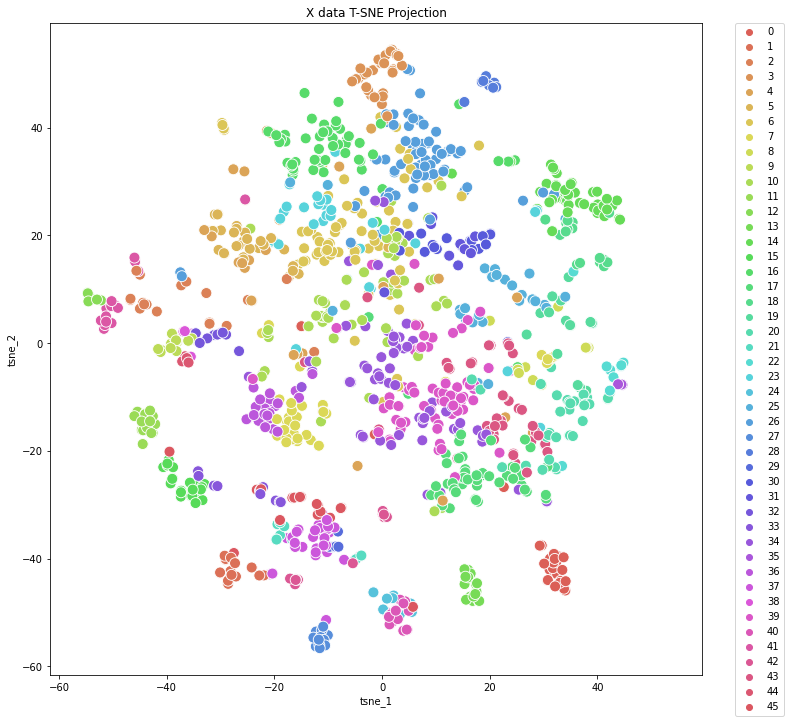

In [182]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_results[:,0], 'tsne_2': tsne_results[:,1], 'label': cluster_labels})
fig, ax = plt.subplots(1,figsize=(12, 12))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label',palette=sns.color_palette("hls", best_num_cluster), data=tsne_result_df, ax=ax,s=120).set(title="X data T-SNE Projection")
lim = (tsne_results.min()-5, tsne_results.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

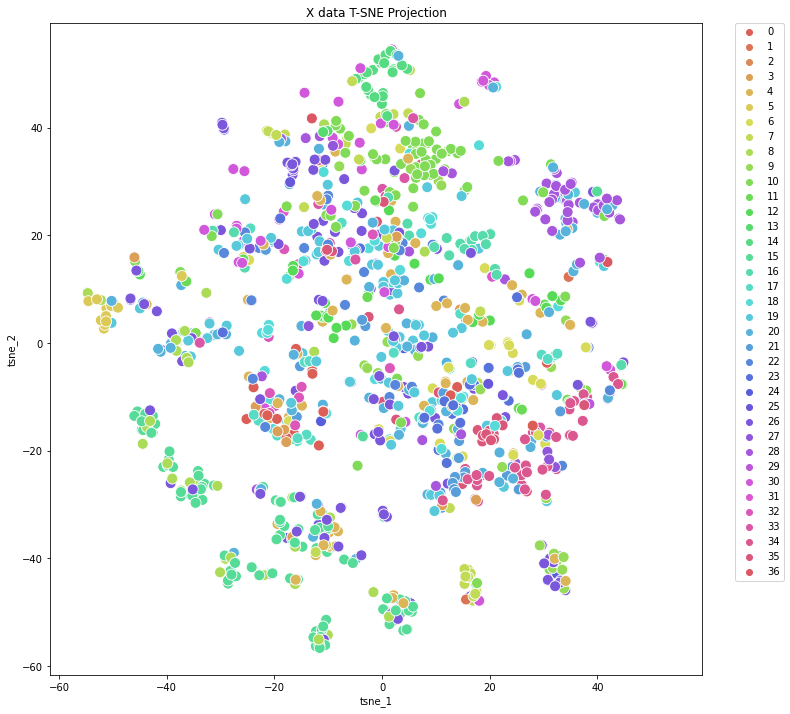

In [197]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_results[:,0], 'tsne_2': tsne_results[:,1], 'label': y})
fig, ax = plt.subplots(1,figsize=(12, 12))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label',palette=sns.color_palette("hls", 37), data=tsne_result_df, ax=ax,s=120).set(title="X data T-SNE Projection")
lim = (tsne_results.min()-5, tsne_results.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [183]:
cluster_class = np.zeros((best_num_cluster,37))
for i in range(best_num_cluster):
  cluster_sample_ind = np.array(clusters_index[i])
  samples_label = y[cluster_sample_ind]
  for j in range(37):
    cluster_class[i,j]= np.count_nonzero(samples_label==j)

In [184]:
CLASS = np.array(range(37))
CLUSTER = np.array(range(best_num_cluster))
MAX_OCCUR_cluster = []
PROP_cluster = []
MAX_OCCUR_tissue = []
PROP_tissue = []
for tissue in range(37):
  max_occur_cluster = np.argmax(cluster_class[:,tissue])
  MAX_OCCUR_cluster.append(max_occur_cluster)
  proportion = cluster_class[max_occur_cluster,tissue]/np.count_nonzero(y==tissue)
  PROP_cluster.append(proportion)
MAX_OCCUR = np.array(MAX_OCCUR_cluster)
PROP = np.array(PROP_cluster)

for cluster in range(best_num_cluster):
  max_occur_tissue = np.argmax(cluster_class[cluster,:])
  MAX_OCCUR_tissue.append(max_occur_tissue)
  proportion = cluster_class[cluster,max_occur_tissue]/cluster_num_of_sources[cluster]
  PROP_tissue.append(proportion)

cluster_class_df = pd.DataFrame({'class(tissue)': CLASS, 'maximum occur (? cluster)': MAX_OCCUR_cluster, '% to all samples of the tissue': PROP_cluster})
blankIndex=[''] * len(cluster_class_df)
cluster_class_df.index=blankIndex
print(cluster_class_df)

print('')

tissue_class_df = pd.DataFrame({'cluster': CLUSTER, 'maximum occur (? tissue)': MAX_OCCUR_tissue, '% to num of members of the cluster': PROP_tissue})
blankIndex=[''] * len(tissue_class_df)
tissue_class_df.index=blankIndex
print(tissue_class_df)

  class(tissue)  maximum occur (? cluster)  % to all samples of the tissue
              0                          7                        0.350000
              1                         13                        0.500000
              2                          4                        1.000000
              3                          7                        0.166667
              4                         10                        0.134328
              5                         41                        0.625000
              6                         43                        0.400000
              7                         13                        0.342857
              8                          1                        0.155556
              9                          0                        0.296296
             10                         26                        0.617978
             11                         43                        0.384615
             12          